In [352]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [353]:
users=pd.read_csv("Users.csv")
engage=pd.read_csv("Engagements.csv")
posts=pd.read_csv("Posts.csv")

In [354]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                50 non-null     object 
 1   age                    50 non-null     int64  
 2   gender                 50 non-null     object 
 3   top_3_interests        50 non-null     object 
 4   past_engagement_score  50 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ KB


In [355]:
engage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     1000 non-null   object
 1   post_id     1000 non-null   object
 2   engagement  1000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [356]:
posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   post_id       100 non-null    object
 1   creator_id    100 non-null    object
 2   content_type  100 non-null    object
 3   tags          100 non-null    object
dtypes: object(4)
memory usage: 3.2+ KB


In [357]:
users.head()

,user_id,age,gender,top_3_interests,past_engagement_score
0,U1,24,F,"sports, art, gaming",0.61
1,U2,32,F,"travel, food, fashion",0.93
2,U3,28,Other,"sports, travel, fashion",0.40
3,U4,25,M,"fashion, music, tech",0.53
4,U5,24,M,"fashion, food, fitness",0.80


In [358]:
posts.head()

,post_id,creator_id,content_type,tags
0,P1,U44,video,"sports, food"
1,P2,U26,video,"music, travel"
2,P3,U32,text,"sports, travel"
3,P4,U6,image,"music, gaming"
4,P5,U32,image,"food, fashion"


In [359]:
engage.head(2)

,user_id,post_id,engagement
0,U1,P52,1
1,U1,P44,0


In [360]:
engage["engagement"].value_counts()

engagement
0    503
1    497
Name: count, dtype: int64

In [361]:
users[["interest_1","interest_2","interest_3"]]=(users["top_3_interests"].str.split(",",expand=True))

In [362]:
users.head()

,user_id,age,gender,top_3_interests,past_engagement_score,interest_1,interest_2,interest_3
0,U1,24,F,"sports, art, gaming",0.61,sports,art,gaming
1,U2,32,F,"travel, food, fashion",0.93,travel,food,fashion
2,U3,28,Other,"sports, travel, fashion",0.40,sports,travel,fashion
3,U4,25,M,"fashion, music, tech",0.53,fashion,music,tech
4,U5,24,M,"fashion, food, fitness",0.80,fashion,food,fitness


In [363]:
users.drop(columns="top_3_interests",inplace=True)

In [364]:
users.head()

,user_id,age,gender,past_engagement_score,interest_1,interest_2,interest_3
0,U1,24,F,0.61,sports,art,gaming
1,U2,32,F,0.93,travel,food,fashion
2,U3,28,Other,0.40,sports,travel,fashion
3,U4,25,M,0.53,fashion,music,tech
4,U5,24,M,0.80,fashion,food,fitness


In [365]:
users["interest_1"] = users["interest_1"].str.strip()
users["interest_2"] = users["interest_2"].str.strip()
users["interest_3"] = users["interest_3"].str.strip()

In [366]:
d1=dict(users["interest_1"].value_counts())
d2=dict(users["interest_2"].value_counts())
d3=dict(users["interest_3"].value_counts())
interests=dict(Counter(d1)+Counter(d2)+Counter(d3))

In [367]:
df=pd.DataFrame(interests,index=[1])

In [368]:
df.head()

,fashion,food,sports,music,gaming,tech,literature,travel,fitness,art
1,19,22,16,11,16,9,12,18,15,12


Text(0, 0.5, 'Frequency')

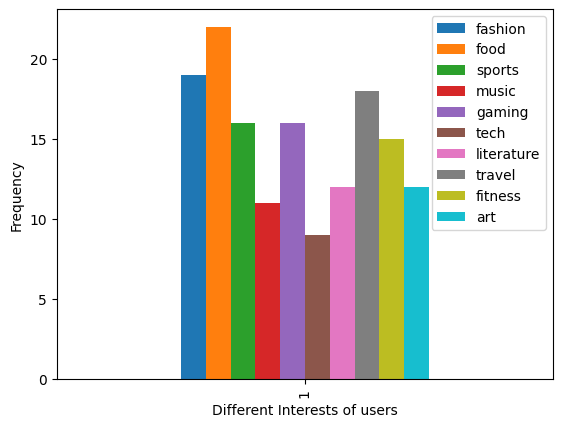

In [369]:
df.plot(kind="bar");
plt.xlabel("Different Interests of users")
plt.ylabel("Frequency")

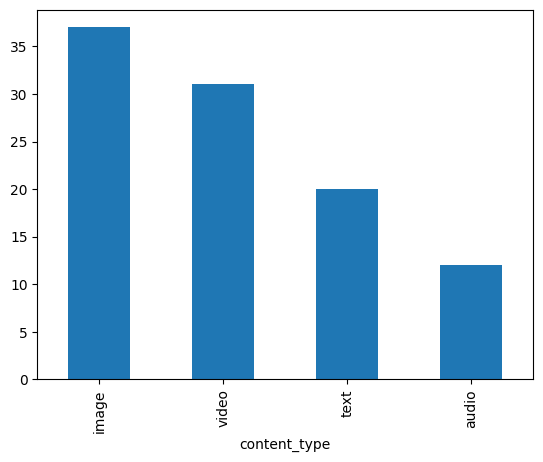

In [370]:
posts["content_type"].value_counts().plot(kind="bar");

<Axes: xlabel='creator_id'>

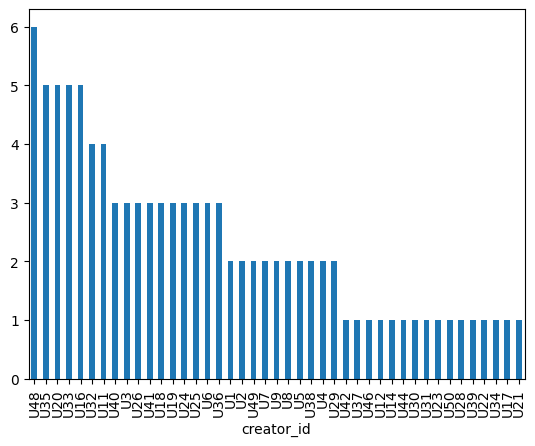

In [371]:
posts["creator_id"].value_counts().plot(kind="bar")

In [372]:
posts.head()

,post_id,creator_id,content_type,tags
0,P1,U44,video,"sports, food"
1,P2,U26,video,"music, travel"
2,P3,U32,text,"sports, travel"
3,P4,U6,image,"music, gaming"
4,P5,U32,image,"food, fashion"


In [373]:
posts["tags"]=posts["tags"].str.strip()

In [374]:
posts[["tag1","tag2"]]=posts["tags"].str.split(",",expand=True)

In [375]:
posts.drop(columns="tags",inplace=True)
posts.head()

,post_id,creator_id,content_type,tag1,tag2
0,P1,U44,video,sports,food
1,P2,U26,video,music,travel
2,P3,U32,text,sports,travel
3,P4,U6,image,music,gaming
4,P5,U32,image,food,fashion


In [376]:
users.head()

,user_id,age,gender,past_engagement_score,interest_1,interest_2,interest_3
0,U1,24,F,0.61,sports,art,gaming
1,U2,32,F,0.93,travel,food,fashion
2,U3,28,Other,0.40,sports,travel,fashion
3,U4,25,M,0.53,fashion,music,tech
4,U5,24,M,0.80,fashion,food,fitness


In [377]:
engage.head()

,user_id,post_id,engagement
0,U1,P52,1
1,U1,P44,0
2,U1,P1,1
3,U1,P4,1
4,U1,P65,0


In [378]:
print(posts.shape)
print(users.shape)
print(engage.shape)

(100, 5)
(50, 7)
(1000, 3)


In [379]:
engage_posts = engage.merge(posts, on="post_id", how="left")

full_df = engage_posts.merge(users, on="user_id", how="left")

final_df = full_df[[
    "user_id", "post_id", "creator_id", "content_type", "tag1", "tag2",
    "past_engagement_score", "interest_1", "interest_2", "interest_3",
    "engagement"
]]
print(final_df.shape)
final_df.head()

(1000, 11)


,user_id,post_id,creator_id,content_type,tag1,tag2,past_engagement_score,interest_1,interest_2,interest_3,engagement
0,U1,P52,U48,video,music,sports,0.61,sports,art,gaming,1
1,U1,P44,U23,image,music,None,0.61,sports,art,gaming,0
2,U1,P1,U44,video,sports,food,0.61,sports,art,gaming,1
3,U1,P4,U6,image,music,gaming,0.61,sports,art,gaming,1
4,U1,P65,U48,image,sports,None,0.61,sports,art,gaming,0


In [380]:
def jaccard_similarity(interests, tags):
    interests_set = set([str(i).strip().lower() for i in interests if pd.notnull(i)])
    tags_set = set([str(t).strip().lower() for t in tags if pd.notnull(t)])
    
    if len(interests_set.union(tags_set)) == 0:
        return 0
    return len(interests_set.intersection(tags_set)) / len(interests_set.union(tags_set))


In [381]:
final_df = final_df.copy()

final_df["overlap_score"] = final_df.apply(
    lambda row: jaccard_similarity(
        [row["interest_1"], row["interest_2"], row["interest_3"]],
        [row["tag1"], row["tag2"]]
    ),
    axis=1
)

In [382]:
final_df.head()

,user_id,post_id,creator_id,content_type,tag1,tag2,past_engagement_score,interest_1,interest_2,interest_3,engagement,overlap_score
0,U1,P52,U48,video,music,sports,0.61,sports,art,gaming,1,0.250000
1,U1,P44,U23,image,music,None,0.61,sports,art,gaming,0,0.000000
2,U1,P1,U44,video,sports,food,0.61,sports,art,gaming,1,0.250000
3,U1,P4,U6,image,music,gaming,0.61,sports,art,gaming,1,0.250000
4,U1,P65,U48,image,sports,None,0.61,sports,art,gaming,0,0.333333


In [383]:
engage.head()

,user_id,post_id,engagement
0,U1,P52,1
1,U1,P44,0
2,U1,P1,1
3,U1,P4,1
4,U1,P65,0


In [384]:
posts.head(23)

,post_id,creator_id,content_type,tag1,tag2
0,P1,U44,video,sports,food
1,P2,U26,video,music,travel
2,P3,U32,text,sports,travel
3,P4,U6,image,music,gaming
4,P5,U32,image,food,fashion
5,P6,U4,image,sports,None
6,P7,U11,image,food,fitness
7,P8,U17,audio,travel,None
8,P9,U38,image,travel,None
9,P10,U24,video,art,None


In [385]:
user_content_pref = (
    final_df.groupby(["user_id", "content_type"])["engagement"]
    .mean()
    .reset_index()
    .rename(columns={"engagement": "content_pref_score"})
)

final_df = final_df.merge(
    user_content_pref, on=["user_id", "content_type"], how="left"
)


In [386]:
final_df.head()

,user_id,post_id,creator_id,content_type,tag1,tag2,past_engagement_score,interest_1,interest_2,interest_3,engagement,overlap_score,content_pref_score
0,U1,P52,U48,video,music,sports,0.61,sports,art,gaming,1,0.250000,0.428571
1,U1,P44,U23,image,music,None,0.61,sports,art,gaming,0,0.000000,0.625000
2,U1,P1,U44,video,sports,food,0.61,sports,art,gaming,1,0.250000,0.428571
3,U1,P4,U6,image,music,gaming,0.61,sports,art,gaming,1,0.250000,0.625000
4,U1,P65,U48,image,sports,None,0.61,sports,art,gaming,0,0.333333,0.625000


In [387]:
user_creator_pref = (
    final_df.groupby(["user_id", "creator_id"])["engagement"]
    .mean()
    .reset_index()
    .rename(columns={"engagement": "creator_pref_score"})
)

final_df = final_df.merge(
    user_creator_pref, on=["user_id", "creator_id"], how="left"
)


In [388]:
final_df.head()

,user_id,post_id,creator_id,content_type,tag1,tag2,past_engagement_score,interest_1,interest_2,interest_3,engagement,overlap_score,content_pref_score,creator_pref_score
0,U1,P52,U48,video,music,sports,0.61,sports,art,gaming,1,0.250000,0.428571,0.5
1,U1,P44,U23,image,music,None,0.61,sports,art,gaming,0,0.000000,0.625000,0.0
2,U1,P1,U44,video,sports,food,0.61,sports,art,gaming,1,0.250000,0.428571,1.0
3,U1,P4,U6,image,music,gaming,0.61,sports,art,gaming,1,0.250000,0.625000,1.0
4,U1,P65,U48,image,sports,None,0.61,sports,art,gaming,0,0.333333,0.625000,0.5


In [389]:
final_df.head()

,user_id,post_id,creator_id,content_type,tag1,tag2,past_engagement_score,interest_1,interest_2,interest_3,engagement,overlap_score,content_pref_score,creator_pref_score
0,U1,P52,U48,video,music,sports,0.61,sports,art,gaming,1,0.250000,0.428571,0.5
1,U1,P44,U23,image,music,None,0.61,sports,art,gaming,0,0.000000,0.625000,0.0
2,U1,P1,U44,video,sports,food,0.61,sports,art,gaming,1,0.250000,0.428571,1.0
3,U1,P4,U6,image,music,gaming,0.61,sports,art,gaming,1,0.250000,0.625000,1.0
4,U1,P65,U48,image,sports,None,0.61,sports,art,gaming,0,0.333333,0.625000,0.5


In [390]:
post_popularity = (
    final_df.groupby("post_id")["engagement"]
    .mean()
    .reset_index()
    .rename(columns={"engagement": "post_popularity"})
)

final_df = final_df.merge(post_popularity, on="post_id", how="left")

In [391]:
final_df.head()

,user_id,post_id,creator_id,content_type,tag1,tag2,past_engagement_score,interest_1,interest_2,interest_3,engagement,overlap_score,content_pref_score,creator_pref_score,post_popularity
0,U1,P52,U48,video,music,sports,0.61,sports,art,gaming,1,0.250000,0.428571,0.5,0.583333
1,U1,P44,U23,image,music,None,0.61,sports,art,gaming,0,0.000000,0.625000,0.0,0.533333
2,U1,P1,U44,video,sports,food,0.61,sports,art,gaming,1,0.250000,0.428571,1.0,0.800000
3,U1,P4,U6,image,music,gaming,0.61,sports,art,gaming,1,0.250000,0.625000,1.0,0.666667
4,U1,P65,U48,image,sports,None,0.61,sports,art,gaming,0,0.333333,0.625000,0.5,0.363636


In [392]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                1000 non-null   object 
 1   post_id                1000 non-null   object 
 2   creator_id             1000 non-null   object 
 3   content_type           1000 non-null   object 
 4   tag1                   1000 non-null   object 
 5   tag2                   563 non-null    object 
 6   past_engagement_score  1000 non-null   float64
 7   interest_1             1000 non-null   object 
 8   interest_2             1000 non-null   object 
 9   interest_3             1000 non-null   object 
 10  engagement             1000 non-null   int64  
 11  overlap_score          1000 non-null   float64
 12  content_pref_score     1000 non-null   float64
 13  creator_pref_score     1000 non-null   float64
 14  post_popularity        1000 non-null   float64
dtypes: fl

In [393]:
w_overlap = 0.4
w_content = 0.2
w_creator = 0.2
w_popularity = 0.2

final_df["final_score"] = (
    w_overlap * final_df["overlap_score"] +
    w_content * final_df["content_pref_score"] +
    w_creator * final_df["creator_pref_score"] +
    w_popularity * final_df["post_popularity"]
)

cols = [c for c in final_df.columns if c != "engagement"] + ["engagement"]
final_df = final_df[cols]

# Preview
final_df.head()

,user_id,post_id,creator_id,content_type,tag1,tag2,past_engagement_score,interest_1,interest_2,interest_3,overlap_score,content_pref_score,creator_pref_score,post_popularity,final_score,engagement
0,U1,P52,U48,video,music,sports,0.61,sports,art,gaming,0.250000,0.428571,0.5,0.583333,0.402381,1
1,U1,P44,U23,image,music,None,0.61,sports,art,gaming,0.000000,0.625000,0.0,0.533333,0.231667,0
2,U1,P1,U44,video,sports,food,0.61,sports,art,gaming,0.250000,0.428571,1.0,0.800000,0.545714,1
3,U1,P4,U6,image,music,gaming,0.61,sports,art,gaming,0.250000,0.625000,1.0,0.666667,0.558333,1
4,U1,P65,U48,image,sports,None,0.61,sports,art,gaming,0.333333,0.625000,0.5,0.363636,0.431061,0


In [394]:
final_df.head(50)

,user_id,post_id,creator_id,content_type,tag1,tag2,past_engagement_score,interest_1,interest_2,interest_3,overlap_score,content_pref_score,creator_pref_score,post_popularity,final_score,engagement
0,U1,P52,U48,video,music,sports,0.61,sports,art,gaming,0.250000,0.428571,0.500000,0.583333,0.402381,1
1,U1,P44,U23,image,music,None,0.61,sports,art,gaming,0.000000,0.625000,0.000000,0.533333,0.231667,0
2,U1,P1,U44,video,sports,food,0.61,sports,art,gaming,0.250000,0.428571,1.000000,0.800000,0.545714,1
3,U1,P4,U6,image,music,gaming,0.61,sports,art,gaming,0.250000,0.625000,1.000000,0.666667,0.558333,1
4,U1,P65,U48,image,sports,None,0.61,sports,art,gaming,0.333333,0.625000,0.500000,0.363636,0.431061,0
5,U1,P32,U7,image,literature,None,0.61,sports,art,gaming,0.000000,0.625000,1.000000,0.428571,0.410714,1
6,U1,P39,U1,video,travel,sports,0.61,sports,art,gaming,0.250000,0.428571,0.000000,0.571429,0.300000,0
7,U1,P33,U41,image,gaming,None,0.61,sports,art,gaming,0.333333,0.625000,0.500000,0.571429,0.472619,0
8,U1,P38,U40,audio,fitness,None,0.61,sports,art,gaming,0.000000,0.500000,1.000000,0.625000,0.425000,1
9,U1,P61,U9,video,literature,art,0.61,sports,art,gaming,0.250000,0.428571,0.000000,0.625000,0.310714,0


In [395]:
X = final_df[[
    "overlap_score",
    "content_pref_score",
    "creator_pref_score",
    "post_popularity",
    "past_engagement_score"
]]
y = final_df["engagement"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [396]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [397]:

y_probs = model.predict_proba(X_test)[:, 1]  # probability of class=1


X_test = X_test.copy()
X_test["user_id"] = final_df.loc[X_test.index, "user_id"]
X_test["post_id"] = final_df.loc[X_test.index, "post_id"]
X_test["true_engagement"] = y_test.values
X_test["predicted_prob"] = y_probs

In [398]:
X_test.head(50)

,overlap_score,content_pref_score,creator_pref_score,post_popularity,past_engagement_score,user_id,post_id,true_engagement,predicted_prob
367,0.250000,0.666667,1.000000,0.500000,0.92,U19,P85,1,0.983121
764,0.666667,0.400000,0.000000,0.500000,0.40,U39,P21,0,0.016624
426,0.000000,0.222222,0.333333,0.461538,0.38,U22,P81,0,0.131666
478,0.000000,0.333333,0.000000,0.714286,0.85,U24,P57,0,0.029783
198,0.250000,0.625000,1.000000,0.466667,0.94,U10,P42,1,0.980774
279,0.000000,0.285714,1.000000,0.400000,0.84,U14,P75,1,0.957319
41,0.250000,0.714286,1.000000,0.571429,0.40,U3,P78,1,0.982922
20,0.250000,0.400000,1.000000,0.642857,0.93,U2,P96,1,0.973426
740,0.000000,0.200000,0.500000,0.687500,0.97,U38,P90,0,0.440221
493,0.250000,0.333333,0.000000,0.583333,0.89,U25,P37,0,0.023128


In [399]:
X_test = X_test.copy()
X_test["creator_id"] = final_df.loc[X_test.index, "creator_id"].values

In [400]:

X_test_sorted = X_test.sort_values(by=["user_id", "predicted_prob"], ascending=[True, False])

top3 = X_test_sorted.groupby("user_id").head(3)


recommendations = (
    top3.groupby("user_id")[["creator_id", "post_id"]]
    .apply(lambda x: x.values.tolist())  
    .reset_index(name="posts")
)


def expand_posts(posts):
    # pad with None if fewer than 3
    posts = posts + [[None, None]] * (3 - len(posts))
    return pd.Series([p[0] for p in posts[:3]], index=["creator_id1", "creator_id2", "creator_id3"]), \
           pd.Series([p[1] for p in posts[:3]], index=["top_post1", "top_post2", "top_post3"])

recommendations = recommendations.join(
    recommendations["posts"].apply(lambda posts: expand_posts(posts)[0])
).join(
    recommendations["posts"].apply(lambda posts: expand_posts(posts)[1])
)

recommendations = recommendations.drop(columns=["posts"])


In [401]:
recommendations.head()

,user_id,creator_id1,creator_id2,creator_id3,top_post1,top_post2,top_post3
0,U1,U7,U48,None,P32,P65,None
1,U10,U3,U14,U25,P23,P96,P42
2,U11,U33,U26,U42,P34,P27,P47
3,U12,U36,U2,None,P75,P54,None
4,U14,U16,U36,U48,P90,P75,P16
